In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [145]:
# Load the data
data = pd.read_csv('Resources/clean_property_data.csv')

# Print the columns to check for the correct column name
print(data.columns)

Index(['district', 'nbhd', 'style', 'extwall', 'stories', 'year_built',
       'rooms', 'finishedsqft', 'units', 'bdrms', 'fbath', 'hbath', 'lotsize',
       'sale_date', 'sale_price', 'sale_year', 'sale_month'],
      dtype='object')


In [146]:

# Clean column names by stripping any extra spaces
data.columns = data.columns.str.strip()

In [147]:

# Check the cleaned column names
print(data.columns)

Index(['district', 'nbhd', 'style', 'extwall', 'stories', 'year_built',
       'rooms', 'finishedsqft', 'units', 'bdrms', 'fbath', 'hbath', 'lotsize',
       'sale_date', 'sale_price', 'sale_year', 'sale_month'],
      dtype='object')


In [148]:
data.info(type)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37764 entries, 0 to 37763
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   district      37764 non-null  int64  
 1   nbhd          37764 non-null  int64  
 2   style         37764 non-null  object 
 3   extwall       37764 non-null  object 
 4   stories       37764 non-null  float64
 5   year_built    37764 non-null  int64  
 6   rooms         37764 non-null  int64  
 7   finishedsqft  37764 non-null  int64  
 8   units         37764 non-null  int64  
 9   bdrms         37764 non-null  int64  
 10  fbath         37764 non-null  int64  
 11  hbath         37764 non-null  int64  
 12  lotsize       37764 non-null  int64  
 13  sale_date     37764 non-null  object 
 14  sale_price    37764 non-null  int64  
 15  sale_year     37764 non-null  int64  
 16  sale_month    37764 non-null  int64  
dtypes: float64(1), int64(13), object(3)
memory usage: 4.9+ MB


In [149]:
#Checking to make sure there are no nulls 
data.isnull().sum()

district        0
nbhd            0
style           0
extwall         0
stories         0
year_built      0
rooms           0
finishedsqft    0
units           0
bdrms           0
fbath           0
hbath           0
lotsize         0
sale_date       0
sale_price      0
sale_year       0
sale_month      0
dtype: int64

In [150]:
#converting the sale date to datetime , becasue when imported here it couldnt read it as datetime
data['sale_date'] = pd.to_datetime(data['sale_date'], errors='coerce')
data.info(type)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37764 entries, 0 to 37763
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   district      37764 non-null  int64         
 1   nbhd          37764 non-null  int64         
 2   style         37764 non-null  object        
 3   extwall       37764 non-null  object        
 4   stories       37764 non-null  float64       
 5   year_built    37764 non-null  int64         
 6   rooms         37764 non-null  int64         
 7   finishedsqft  37764 non-null  int64         
 8   units         37764 non-null  int64         
 9   bdrms         37764 non-null  int64         
 10  fbath         37764 non-null  int64         
 11  hbath         37764 non-null  int64         
 12  lotsize       37764 non-null  int64         
 13  sale_date     37764 non-null  datetime64[ns]
 14  sale_price    37764 non-null  int64         
 15  sale_year     37764 non-null  int64 

In [151]:
#dropping saledate b/c it's not needed for the model. We're going to use sale-year and sale-month
data = data.drop(columns=['sale_date'])
data

,district,nbhd,style,extwall,stories,year_built,rooms,finishedsqft,units,bdrms,fbath,hbath,lotsize,sale_price,sale_year,sale_month
0,9,40,cape cod,aluminum/vinyl,1.0,1942,7,1182,1,4,1,1,33541,160000,2023,12
1,9,40,ranch,fiber cement/hardiplank,1.0,2006,9,1880,1,3,2,0,10607,387500,2023,8
2,9,40,ranch,aluminum/vinyl,1.0,1980,6,1489,1,3,3,0,8640,335000,2023,8
3,9,40,ranch,aluminum/vinyl,1.0,1986,5,1209,1,3,1,1,7200,250000,2023,6
4,9,40,colonial,aluminum/vinyl,2.0,1989,6,1663,1,3,2,1,7200,270000,2023,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37759,14,4180,milwaukee bungalow,aluminum / vinyl,1.0,1922,0,988,1,3,1,0,3660,61500,2013,12
37760,14,4620,ranch,aluminum / vinyl,1.0,1950,0,1119,1,3,1,0,5120,65000,2013,12
37761,14,4700,ranch,aluminum / vinyl,1.0,1951,0,725,1,2,1,0,5546,97500,2013,12
37762,14,4600,residence o/s,aluminum / vinyl,1.0,1926,0,937,1,2,1,0,4560,149000,2013,12


In [152]:
# Converting all non-numerical vvalues to numerical category 
data_dummies = pd.get_dummies(data)
data_dummies

,district,nbhd,stories,year_built,rooms,finishedsqft,units,bdrms,fbath,hbath,...,extwall_frame,extwall_masonary frame,extwall_masonry / frame,extwall_masonry/frame,extwall_metal siding,extwall_precast masonary,extwall_prem wood,extwall_stone,extwall_stucco,extwall_wood
0,9,40,1.0,1942,7,1182,1,4,1,1,...,False,False,False,False,False,False,False,False,False,False
1,9,40,1.0,2006,9,1880,1,3,2,0,...,False,False,False,False,False,False,False,False,False,False
2,9,40,1.0,1980,6,1489,1,3,3,0,...,False,False,False,False,False,False,False,False,False,False
3,9,40,1.0,1986,5,1209,1,3,1,1,...,False,False,False,False,False,False,False,False,False,False
4,9,40,2.0,1989,6,1663,1,3,2,1,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37759,14,4180,1.0,1922,0,988,1,3,1,0,...,False,False,False,False,False,False,False,False,False,False
37760,14,4620,1.0,1950,0,1119,1,3,1,0,...,False,False,False,False,False,False,False,False,False,False
37761,14,4700,1.0,1951,0,725,1,2,1,0,...,False,False,False,False,False,False,False,False,False,False
37762,14,4600,1.0,1926,0,937,1,2,1,0,...,False,False,False,False,False,False,False,False,False,False


In [168]:
#creating the independent variables set 
X = data_dummies.drop(columns=['sale_price'])
X

,district,nbhd,stories,year_built,rooms,finishedsqft,units,bdrms,fbath,hbath,...,extwall_frame,extwall_masonary frame,extwall_masonry / frame,extwall_masonry/frame,extwall_metal siding,extwall_precast masonary,extwall_prem wood,extwall_stone,extwall_stucco,extwall_wood
0,9,40,1.0,1942,7,1182,1,4,1,1,...,False,False,False,False,False,False,False,False,False,False
1,9,40,1.0,2006,9,1880,1,3,2,0,...,False,False,False,False,False,False,False,False,False,False
2,9,40,1.0,1980,6,1489,1,3,3,0,...,False,False,False,False,False,False,False,False,False,False
3,9,40,1.0,1986,5,1209,1,3,1,1,...,False,False,False,False,False,False,False,False,False,False
4,9,40,2.0,1989,6,1663,1,3,2,1,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37759,14,4180,1.0,1922,0,988,1,3,1,0,...,False,False,False,False,False,False,False,False,False,False
37760,14,4620,1.0,1950,0,1119,1,3,1,0,...,False,False,False,False,False,False,False,False,False,False
37761,14,4700,1.0,1951,0,725,1,2,1,0,...,False,False,False,False,False,False,False,False,False,False
37762,14,4600,1.0,1926,0,937,1,2,1,0,...,False,False,False,False,False,False,False,False,False,False


In [169]:
# creating the dependent variable set 
y = data_dummies['sale_price']
y

0        160000
1        387500
2        335000
3        250000
4        270000
          ...  
37759     61500
37760     65000
37761     97500
37762    149000
37763    102900
Name: sale_price, Length: 37764, dtype: int64

In [170]:
# spliting data into training and testing 90/10 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

## Linear Regression


In [171]:
# setting the model to linear regression 
model = LinearRegression()
# fitting the model 
model.fit(X_train, y_train)

LinearRegression()

In [172]:
coef = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coef

,Coefficient
district,-2281.364288
nbhd,23.115726
stories,11810.388654
year_built,143.993609
rooms,1061.350300
finishedsqft,75.056398
units,-51519.939141
bdrms,-4135.822479
fbath,34882.089715
hbath,18126.688275


In [173]:
# Prediction with test data 
y_pred = model.predict(X_test)
# getting mean square 
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 21728592436.646114


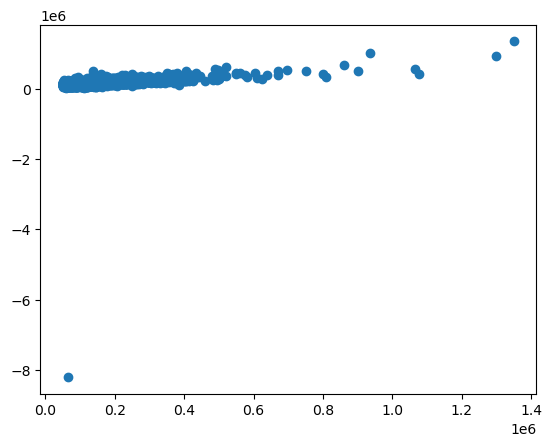

In [174]:
plt.scatter(y_test, y_pred)

In [175]:
y_pred = pd.DataFrame(y_pred)
y_pred

,0
0,235400.980435
1,129566.883340
2,98703.668057
3,152934.291766
4,216992.481348
...,...
3772,274227.628370
3773,309150.224743
3774,188336.936500
3775,125049.915165


In [176]:
y_test

9681     239900
6271     155040
30205     98000
19176    174900
9801     260000
          ...  
12640    305000
4520     333000
11849    120000
32305    164000
3905     250000
Name: sale_price, Length: 3777, dtype: int64

In [177]:
# determining accuracy score 
model.score(X_test, y_test)

-1.6141253482097095

## Random Forest Regressor

In [178]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [179]:
y_pred = model.predict(X_test)
# getting mean square 
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 1563454326.3411477


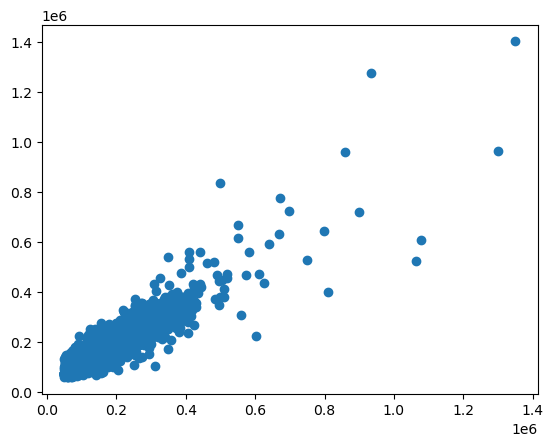

In [180]:
plt.scatter(y_test, y_pred)

In [181]:
model.score(X_test, y_test)

0.8119038038394271